<a href="https://colab.research.google.com/github/claarr/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama  : Clarita Putri Anggraeni
# Kelas : TI-3G
# NIM   : 2141720213

## Jobsheet 3 (Operasi Dasar Citra)

### Praktikum

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#### Transformasi Linier Brightness

Formula:g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness

Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan : 50


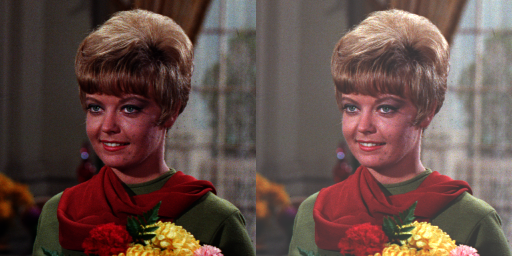

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

#### Tugas Praktikum

1. Implementasikan inversi citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian ulasan teori.

𝑔(𝑥) = 255 − 𝑓(𝑥) , dimana g(x,y) adalah citra negative, dan f(x,y) adalah citra asli

Inverse Citra
---------------------------------
Masukkan nilai inverse : 10


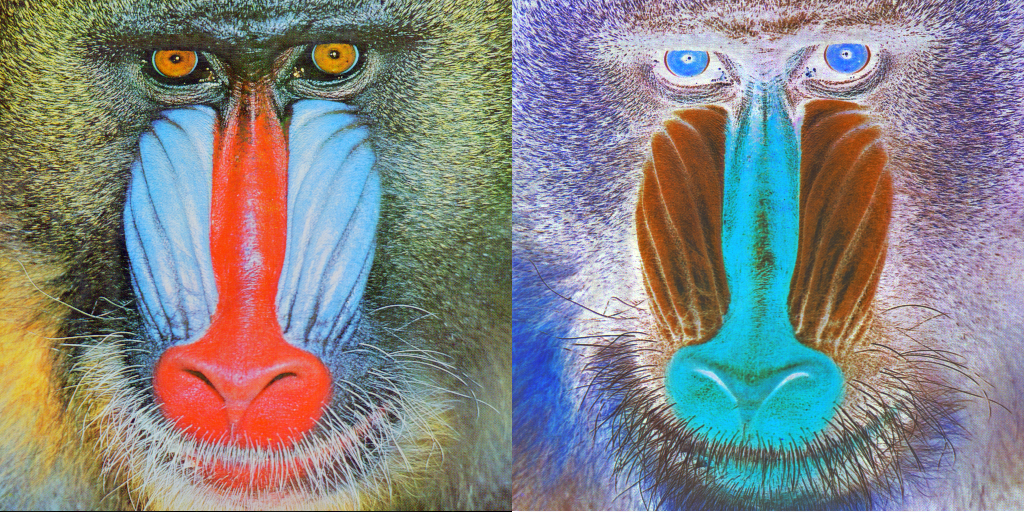

In [ ]:
print('Inverse Citra')
print('---------------------------------')

try:
  inverse = int(input('Masukkan nilai inverse : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/mandrill.tiff')
inverse_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
      inverse_image[y,x,c] = np.clip(255 - original[y,x,c] + inverse, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

𝑔(𝑥, 𝑦) = 𝑎 ∗ 𝑓(𝑥, 𝑦) + 𝑏 , dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness.

Mengubah kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


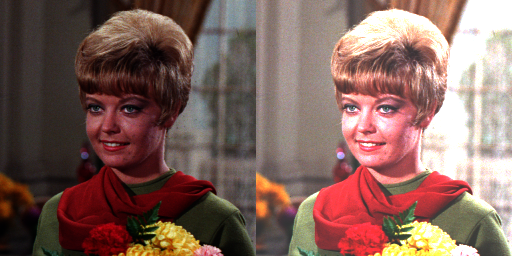

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------')

try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  kontras = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/female.tiff')
kontras_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      kontras_image[y,x,c] = np.clip(kontras * original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, kontras_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log.

Secara umum bentuk dari transfomasi log adalah: 𝑠 = 𝑐 ∗ 𝑙𝑜𝑔(1 + 𝑟)
dimana c : konstanta r : nilai grey-level citra input s : nilai grey-level citra output

Mengubah tingkat kecerahan citra dengan Transformasi Log
---------------------------------
Masukkan nilai kecerahan: 50


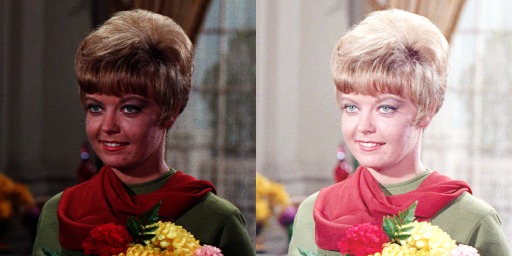

In [ ]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('---------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/female.tiff')
logarithmic_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      logarithmic_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, logarithmic_image))
cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori.

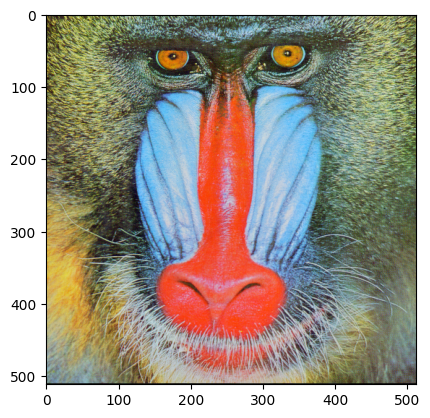

In [ ]:
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)

a. Averaging

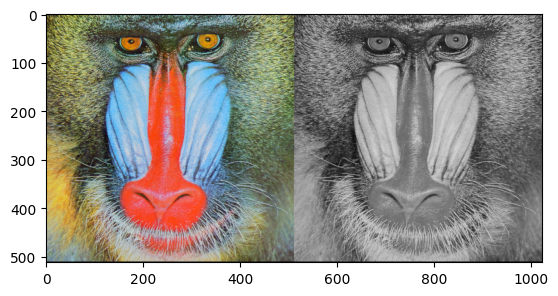

In [ ]:
grayscale_image = np.zeros_like(img_rgb)

for y in range(img_rgb.shape[0]):
    for x in range(img_rgb.shape[1]):
        r = int(img_rgb[y, x, 2])
        g = int(img_rgb[y, x, 1])
        b = int(img_rgb[y, x, 0])

        grayscale_averaging = np.clip((r + g + b) / 3, 0, 255)

        grayscale_image[y, x, 0] = grayscale_averaging
        grayscale_image[y, x, 1] = grayscale_averaging
        grayscale_image[y, x, 2] = grayscale_averaging

final_frame_grayscale = cv.hconcat([img_rgb, grayscale_image])
plt.imshow(final_frame_grayscale)

b. Lightness

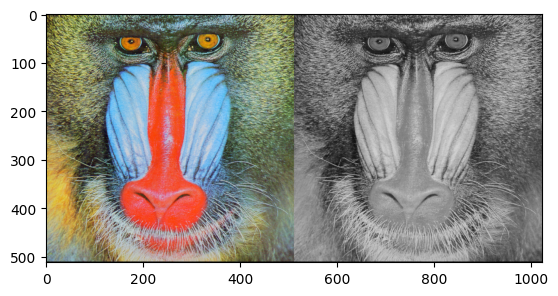

In [ ]:
grayscale_image = np.zeros_like(img_rgb)

for y in range(img_rgb.shape[0]):
    for x in range(img_rgb.shape[1]):
        r = int(img_rgb[y, x, 2])
        g = int(img_rgb[y, x, 1])
        b = int(img_rgb[y, x, 0])

        grayscale_lightness = (max(r, g, b) + min(r, g, b)) / 2

        grayscale_image[y, x, 0] = grayscale_lightness
        grayscale_image[y, x, 1] = grayscale_lightness
        grayscale_image[y, x, 2] = grayscale_lightness

final_frame_grayscale = cv.hconcat([img_rgb, grayscale_image])
plt.imshow(final_frame_grayscale)


c. Luminance

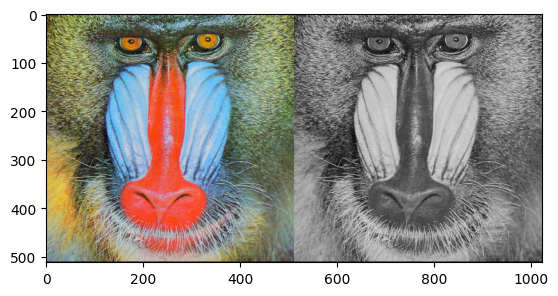

In [ ]:
grayscale_image = np.zeros_like(img_rgb)

for y in range(img_rgb.shape[0]):
    for x in range(img_rgb.shape[1]):
        r = int(img_rgb[y, x, 2])
        g = int(img_rgb[y, x, 1])
        b = int(img_rgb[y, x, 0])

        grayscale_luminance = 0.21 * r + 0.72 * g + 0.07 * b

        grayscale_image[y, x, 0] = grayscale_luminance
        grayscale_image[y, x, 1] = grayscale_luminance
        grayscale_image[y, x, 2] = grayscale_luminance

final_frame_grayscale = cv.hconcat([img_rgb, grayscale_image])
plt.imshow(final_frame_grayscale)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


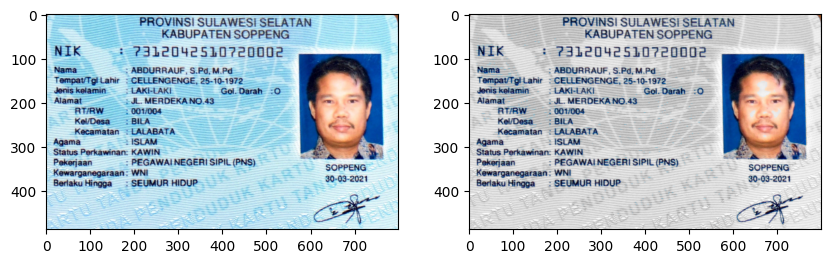

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/KTP.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

ret, mask = cv.threshold(img_rgb[:, :, 2], 200, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img)
mask3[:, :, 2] = mask

gray_background = cv.cvtColor(mask3, cv.COLOR_BGR2GRAY)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
img_gray = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)

# Mengatur latar belakang abu-abu menjadi warna asli
img_gray[mask3[:, :, 2] == 0] = img_rgb[mask3[:, :, 2] == 0]

img_blue_text = img_rgb.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if mask3[i, j, 2] == 255:
            img_blue_text[i, j] = [0, 0, 255]

# Mengatur alpha channel hanya pada latar belakang
alpha_channel = np.ones((img.shape[0], img.shape[1], 1), dtype=np.uint8) * 255
alpha_channel[mask3[:, :, 2] == 50] = 0

# Menggabungkan gambar utama dengan alpha channel
out = np.dstack((img_gray, alpha_channel))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_rgb)
ax[1].imshow(out)
plt.show()